In [1]:
pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("MOCK_DATA.csv")

In [5]:
df.head()

,bug_id,module,severity,status,reported_date,resolved_date,assigned_to
0,1,Login,High,In Progress,2025-01-04,2025-01-29,David
1,2,Payment,Critical,In Progress,2025-06-03,2025-06-26,Fred
2,3,Notifications,High,Closed,2025-01-12,2025-01-13,Charlie
3,4,Dashboard,Low,In Progress,2024-12-22,2025-01-08,Alice
4,5,Login,High,Resolved,2024-12-15,2025-01-11,Bob


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bug_id         300 non-null    int64 
 1   module         300 non-null    object
 2   severity       300 non-null    object
 3   status         300 non-null    object
 4   reported_date  300 non-null    object
 5   resolved_date  300 non-null    object
 6   assigned_to    300 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


In [7]:
df.describe()

,bug_id
count,300.000000
mean,150.500000
std,86.746758
min,1.000000
25%,75.750000
50%,150.500000
75%,225.250000
max,300.000000


In [8]:
print(df['severity'])

0          High
1      Critical
2          High
3           Low
4          High
         ...   
295      Medium
296        High
297    Critical
298      Medium
299      Medium
Name: severity, Length: 300, dtype: object


In [17]:
print(df[df[['severity']=='High'].value_counts()])

KeyError: False

In [23]:
print(df['module'].value_counts())

module
Login            68
Dashboard        64
Notifications    58
Payment          57
Reports          53
Name: count, dtype: int64


In [11]:
print(df['assigned_to'].value_counts())

assigned_to
Alice      54
Fred       51
Ellie      47
Gizel      43
David      42
Charlie    32
Bob        31
Name: count, dtype: int64


In [12]:
print(df['module'].value_counts())

module
Login            68
Dashboard        64
Notifications    58
Payment          57
Reports          53
Name: count, dtype: int64


In [15]:
high_bugs = df[df['severity']=='High']

In [16]:
print(high_bugs)

     bug_id         module severity       status reported_date resolved_date  \
0         1          Login     High  In Progress    2025-01-04    2025-01-29   
2         3  Notifications     High       Closed    2025-01-12    2025-01-13   
4         5          Login     High     Resolved    2024-12-15    2025-01-11   
7         8        Reports     High  In Progress    2025-01-09    2025-02-03   
11       12  Notifications     High         Open    2025-06-04    2025-06-07   
..      ...            ...      ...          ...           ...           ...   
285     286      Dashboard     High       Closed    2025-01-25    2025-01-29   
287     288        Payment     High  In Progress    2025-07-23    2025-08-19   
291     292          Login     High  In Progress    2025-08-22    2025-09-06   
294     295        Reports     High     Resolved    2025-01-17    2025-02-15   
296     297        Payment     High       Closed    2025-10-04    2025-10-26   

    assigned_to  
0         David  
2  

In [20]:
recent_bugs = df.sort_values(by="reported_date", ascending=False)
print(recent_bugs)

     bug_id         module  severity    status reported_date resolved_date  \
296     297        Payment      High    Closed    2025-10-04    2025-10-26   
25       26        Payment       Low  Resolved    2025-10-04    2025-10-08   
127     128      Dashboard      High  Resolved    2025-10-03    2025-10-10   
280     281  Notifications    Medium    Closed    2025-09-30    2025-10-02   
97       98  Notifications    Medium  Resolved    2025-09-30    2025-10-09   
..      ...            ...       ...       ...           ...           ...   
88       89  Notifications  Critical  Resolved    2024-10-14    2024-10-23   
65       66      Dashboard  Critical      Open    2024-10-13    2024-10-14   
140     141        Payment      High    Closed    2024-10-12    2024-10-28   
182     183      Dashboard      High  Resolved    2024-10-07    2024-11-05   
70       71        Reports    Medium    Closed    2024-10-06    2024-10-21   

    assigned_to  
296         Bob  
25         Fred  
127      

In [26]:
bugs_per_module = df.groupby('module')['bug_id'].count().reset_index()
print(bugs_per_module)

          module  bug_id
0      Dashboard      64
1          Login      68
2  Notifications      58
3        Payment      57
4        Reports      53


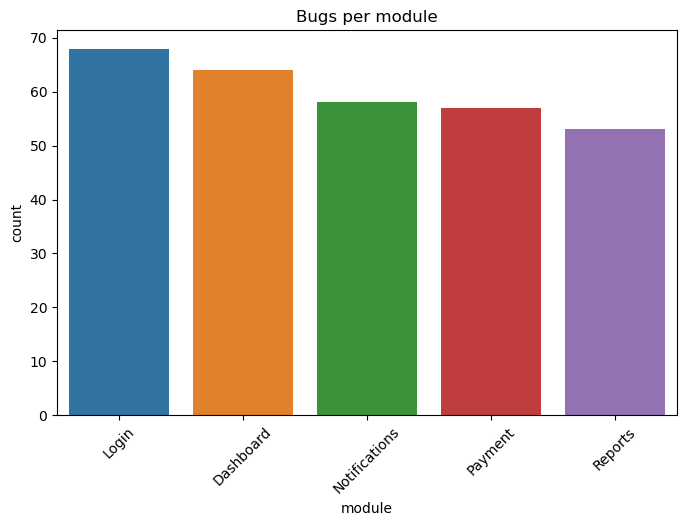

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='module', data=df, order=df['module'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Bugs per module')
plt.show()

In [ ]:
help(round)